<a href="https://colab.research.google.com/github/SidharrthSingh25/ML/blob/master/ASSIGNMENT_7/Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. DATA PREPROCESSING

1.1 IMPORTING LIBRARIES

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1.2 IMPORTING DATASETS

In [6]:
dataset = pd.read_csv ('datasets_4458_8204_winequality-red.csv')
X = dataset.iloc [ : , :-1].values
Y = dataset.iloc [ : ,-1].values

In [7]:
print (X)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


In [8]:
print (Y)

[5 5 5 ... 6 5 6]


In [9]:
for i in range (1599):
  if Y[i]>=7:
    Y[i]=1
  else:
    Y[i]=0 

In [10]:
print (Y)

[0 0 0 ... 0 0 0]


1.3 SPLITTING INTO TRAINING AND TEST SET

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.125, random_state = 0)

In [12]:
print (X_train)

[[ 8.8   0.42  0.21 ...  3.19  0.52  9.2 ]
 [ 6.8   0.49  0.22 ...  3.41  0.83 11.3 ]
 [ 7.5   0.63  0.27 ...  3.26  0.58  9.8 ]
 ...
 [ 7.9   0.57  0.31 ...  3.29  0.69  9.5 ]
 [13.    0.47  0.49 ...  3.3   0.68 12.7 ]
 [ 9.8   0.98  0.32 ...  3.25  0.48  9.4 ]]


In [13]:
print (Y_train)

[0 0 0 ... 0 0 0]


In [14]:
print (X_test)

[[10.8   0.47  0.43 ...  3.17  0.76 10.8 ]
 [ 8.1   0.82  0.   ...  3.36  0.53  9.6 ]
 [ 9.1   0.29  0.33 ...  3.26  0.84 11.7 ]
 ...
 [ 9.    0.82  0.14 ...  3.39  0.63  9.8 ]
 [ 9.1   0.64  0.23 ...  3.28  0.59  9.7 ]
 [ 8.9   0.62  0.18 ...  3.16  0.88  9.2 ]]


In [15]:
print (Y_test)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


1.4 FEATURE SCALING

In [16]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler ()
X_train = sc_X.fit_transform (X_train)
X_test = sc_X.transform (X_test)

In [17]:
print (X_train)

[[ 0.27229747 -0.60301283 -0.31403918 ... -0.7821096  -0.80156469
  -1.14265192]
 [-0.88365508 -0.2184277  -0.26295304 ...  0.64767     0.99275032
   0.83688464]
 [-0.47907169  0.55074256 -0.00752233 ... -0.32717973 -0.45427791
  -0.57707004]
 ...
 [-0.24788118  0.22109816  0.19682223 ... -0.13220978  0.18241451
  -0.85986098]
 [ 2.69979784 -0.32830917  1.11637278 ... -0.0672198   0.12453338
   2.15657567]
 [ 0.85027375  2.47366821  0.24790837 ... -0.39216971 -1.03308921
  -0.95412463]]


In [18]:
print (X_test)

[[ 1.42825003 -0.32830917  0.80985593 ... -0.91208957  0.58758242
   0.36556641]
 [-0.13228592  1.59461648 -1.38684815 ...  0.32272009 -0.74368356
  -0.76559733]
 [ 0.44569036 -1.31724236  0.29899451 ... -0.32717973  1.05063145
   1.21393922]
 ...
 [ 0.38789273  1.59461648 -0.67164217 ...  0.51769003 -0.16487227
  -0.57707004]
 [ 0.44569036  0.60568329 -0.2118669  ... -0.19719977 -0.39639678
  -0.67133369]
 [ 0.3300951   0.49580182 -0.46729761 ... -0.97707955  1.28215597
  -1.14265192]]


## 2. LOGISTIC REGRESSION MODEL

2.1 TRAINING LOGISTIC REGRESSION MODEL ON TRAINING SET

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression ()
classifier.fit (X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

2.2 PREDICTING NEW RESULT

In [20]:
print (classifier.predict ([[7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4]]))

[0]


2.3 PREDICTING TEST SET RESULTS

In [21]:
Y_pred = classifier.predict (X_test)
print (np.concatenate ((Y_pred.reshape (len (Y_pred),1), Y_test.reshape (len (Y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

2.4 MODEL ACCURACY

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix (Y_test, Y_pred)
print (cm)
acc = accuracy_score (Y_test, Y_pred)
print ('MODEL ACCURACY is - ' + str (acc*100) + '%')

[[172   8]
 [ 13   7]]
MODEL ACCURACY is - 89.5%


## 3. VISUALISING TEST SET RESULTS

In [23]:
X_test = sc_X.inverse_transform (X_test)

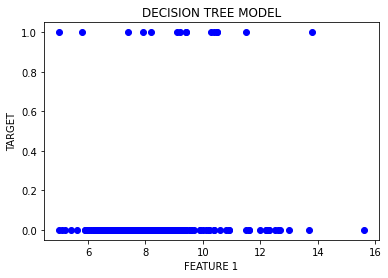

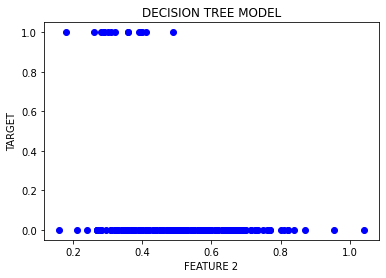

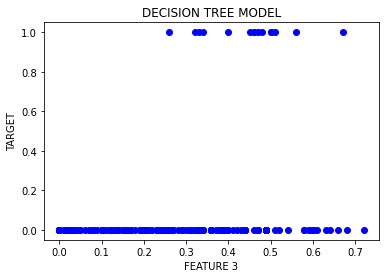

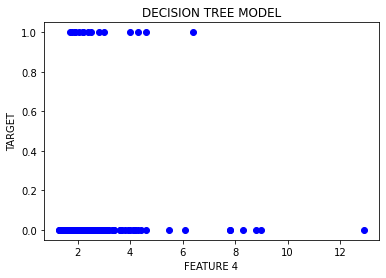

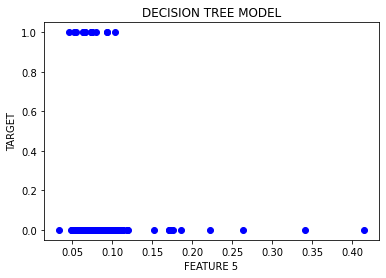

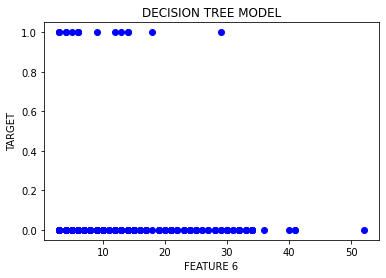

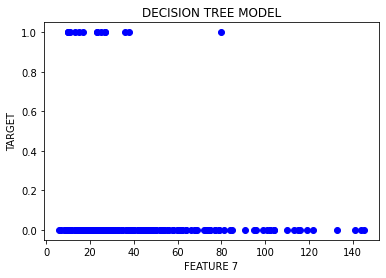

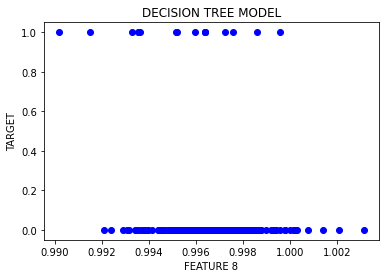

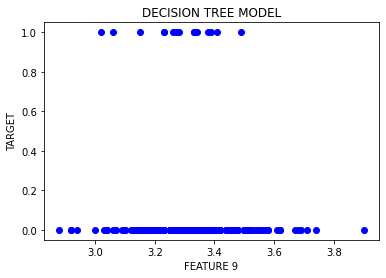

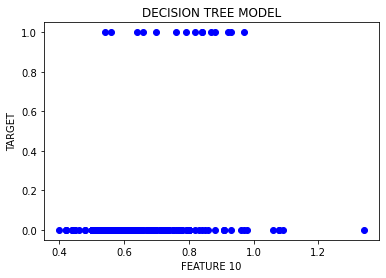

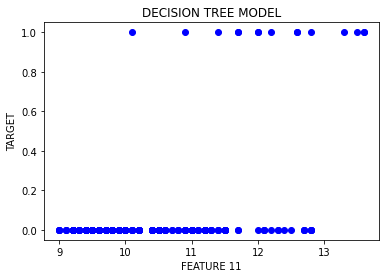

In [24]:
for i in range (11):
  plt.figure ()
  plt.scatter (X_test [ : ,i], Y_pred, color = 'blue')
  plt.title ('DECISION TREE MODEL')
  plt.xlabel ('FEATURE ' + str (i+1))
  plt.ylabel ('TARGET')
  plt.show ()